# Exercise 1 - ICP

In this exercise you will implement the ICP algorithm for a small 2D example dataset. 

## 1.1 ICP with given correspondences [5]

Implement ICP if the point correspondences are given. 
A starting point for this exercise is given as follows. 

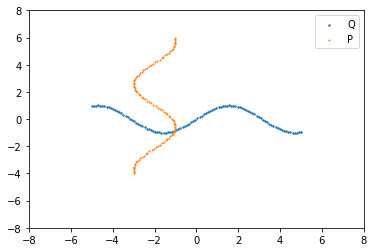

In [1]:
import ex1 as ex
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.load('icp_data.npz')
q = data['LineGroundTruth']
p = data['LineMovedCorresp']
    
# Show the initial positions of the lines
ex.show_figure(q, p)

Following the missing parts in the algorithm, you will need to: 
  - compute mean point of an array of points in function **compute_mean()**;
  - compute cross covariance matrix **W** in **function compute_W()**;
  - compute estimated rotation and translation via **SVD** in function **compute_R_t()**;
  - apply the estimated rotation and translation and find the value of the squared error function to discover how good the estimated positions are in function **compute_error()**;
  - complete the fuction **icp_known_corresp()**.

Refer to the lecture slides for all the details. 

After you have implemented all the above, you should run the following code correctly and get the aligned Q (line 1) and P (line2).

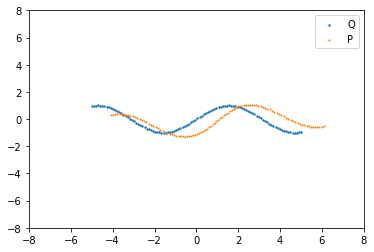

Error value is:  10.6489015967167


In [2]:
# We assume that the there are 1 to 1 correspondences for this data
# Assign labels
q_indices = np.arange(len(q[0]))
p_indices = np.arange(len(p[0]))

# Perform icp given the correspondences
[p_transformed, error] = ex.icp_known_corresp(q, p, q_indices, p_indices)

# Show the adjusted positions of the lines
ex.show_figure(q, p_transformed)

# print the error
print('Error value is: ', error)

## 1.2 ICP without given correspondences [5]

Use the result of your code from the first question, to implement the full ICP algorithm.

When the point correspondences are not available. You will need to iteratively find the point correspondences and using these perform the ICP updates. 

A starting point for this exercise is given as follows.

Make you algorithm stop after convergence. 

**Hint:** The **NearestNeighbors** functions of **sklearn** library can be useful in this task.

(2, 100)


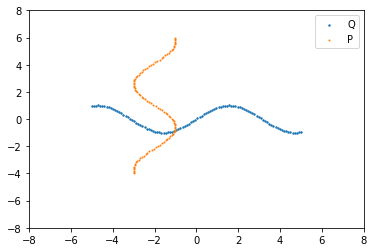

Error value on 11999 iteration is:  3116.4070185557125

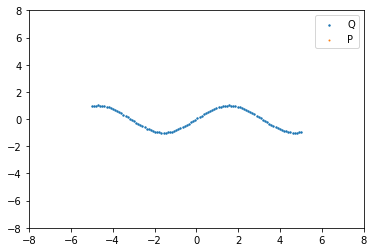

In [8]:
from sklearn.neighbors import NearestNeighbors

data = np.load('icp_data.npz')
line1 = data['LineGroundTruth']
line2 = data['LineMovedNoCorresp']

print(line1.shape)

niters = 100
eps = 0.001
error = np.inf

# show figure
ex.show_figure(line1, line2)
    
K = 1
nbrs = NearestNeighbors(n_neighbors=K, radius=0.4, algorithm='kd_tree').fit(line1.reshape(100, 2))
    
for i in range(niters + 1):
    distances, line2_indices = nbrs.kneighbors(line2.reshape(100, 2))
    
    line1_indices = np.arange(len(line1[0]))
    line2_indices = line2_indices.reshape(len(line1_indices))

    prev_error = error
    [line2, error] = ex.icp_known_corresp(line1, line2, line1_indices, line2_indices)
        
    print('\rError value on ' + str(i) + ' iteration is: ', error, end='')
    if (prev_error - error) <= 0 and error <= eps:
        break
        
ex.show_figure(line1, line2)